In [21]:
import pandas as pd
import numpy as np


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#imports
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd

# Load the iris dataset using scikit-learn.

In [22]:
data = load_iris()

In [23]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Split the dataset into training and testing sets with 70% of the data for training and 30% for testing.

In [24]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [26]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'pandas.core.frame.DataFrame'> (105, 4)
<class 'pandas.core.frame.DataFrame'> (45, 4)
<class 'numpy.ndarray'> (105,)
<class 'numpy.ndarray'> (45,)


# Train a decision tree classifier using the entropy criterion and evaluate its accuracy on the testing set.

In [27]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)

DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [28]:
DTC_Model.score(X_train , y_train)

1.0

In [29]:
y_pred = DTC_Model.predict(X_test)

In [30]:
accuracy=DTC_Model.score(X_test , y_test)
print("Accuracy using the entropy criterion is ",accuracy)

Accuracy using the entropy criterion is  0.9777777777777777


# Train another decision tree classifier using the gini criterion and evaluate its accuracy on the testing set.

In [31]:
DTC_gini =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)

DTC_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [32]:
DTC_gini.score(X_train , y_train)

1.0

In [33]:
y_pred = DTC_gini.predict(X_test)


In [34]:
accuracy_gini=DTC_gini.score(X_test , y_test)
print("Accuracy using the gini criterion is ",accuracy_gini)

Accuracy using the gini criterion is  0.9777777777777777


# Compare the performance of the two classifiers and discuss the differences in terms of accuracy.

In [35]:
feature_importances_entropy = DTC_Model.feature_importances_
feature_importances_gini = DTC_gini.feature_importances_

print("Feature importances using the entropy criterion:", feature_importances_entropy)
print("Feature importances using the gini criterion:", feature_importances_gini)

Feature importances using the entropy criterion: [0.01956167 0.01956167 0.31718038 0.64369628]
Feature importances using the gini criterion: [0.02150464 0.02150464 0.40406279 0.55292793]


# Visualize the decision tree for each classifier and compare the tree structure and feature importance.

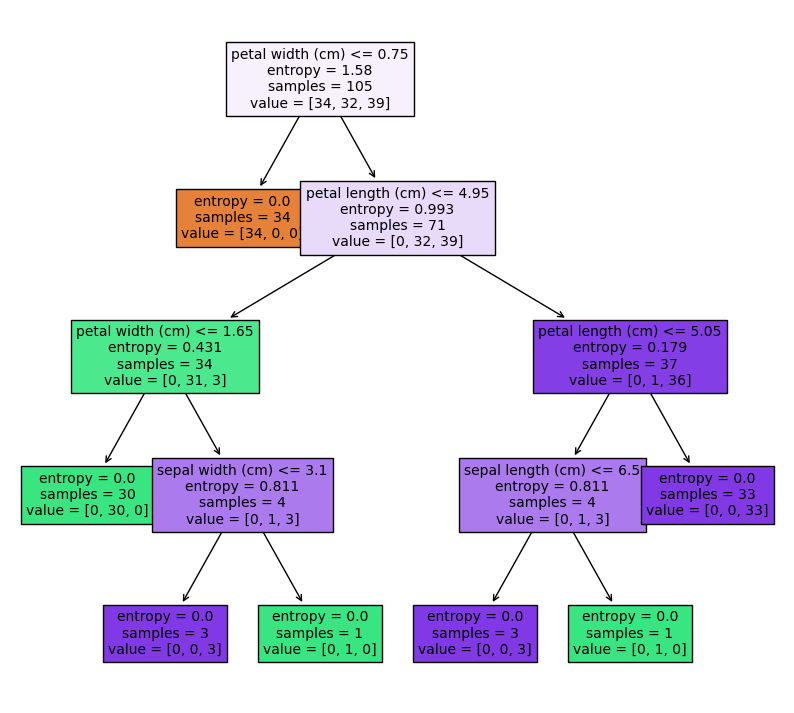

In [36]:
plt.figure(figsize=(10, 9))

DTC_tree = tree.plot_tree(DTC_Model, filled=True, 
                          feature_names=data.feature_names,
                          fontsize=10,  
                          )

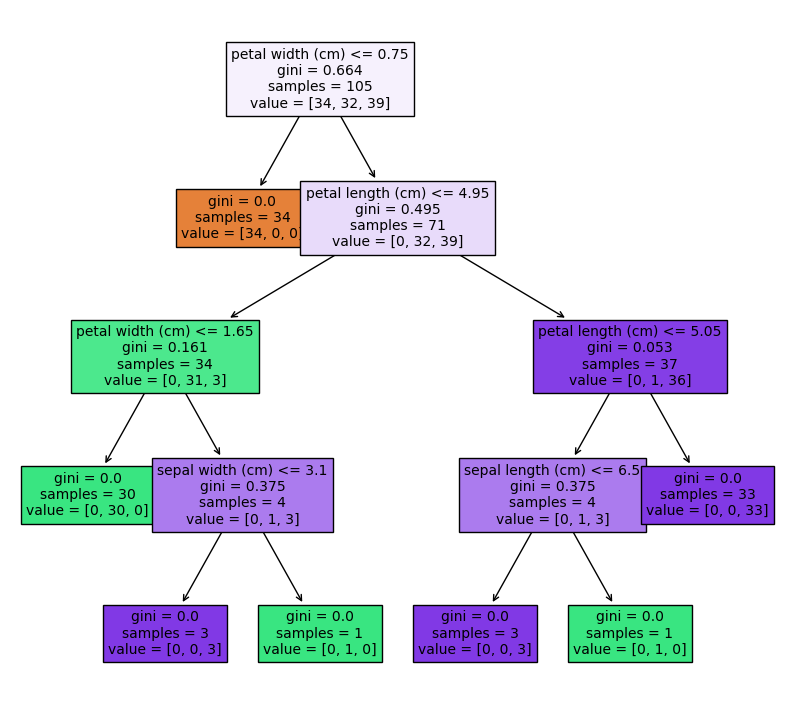

In [37]:
plt.figure(figsize=(10, 9))

DTC_tree = tree.plot_tree(DTC_gini, filled=True, 
                          feature_names=data.feature_names,
                          fontsize=10,  
                          )

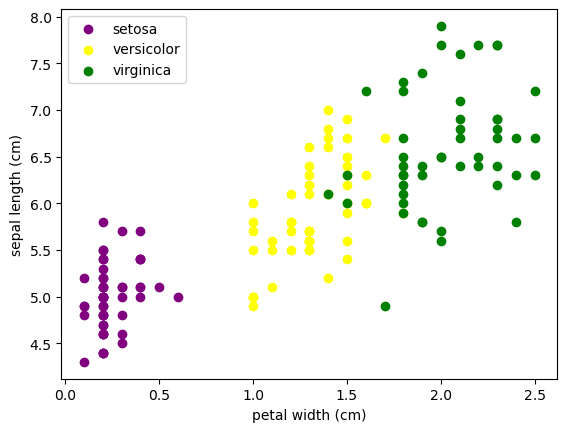

In [42]:
fig, ax = plt.subplots()

x_index = 3
y_index = 0

colors = ['purple', 'yellow', 'green']

for label, color in zip(range(len(data.target_names)), colors):
    ax.scatter(data.data[data.target==label, x_index], 
                data.data[data.target==label, y_index],
                label=data.target_names[label],
                c=color)

ax.set_xlabel(data.feature_names[x_index])
ax.set_ylabel(data.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

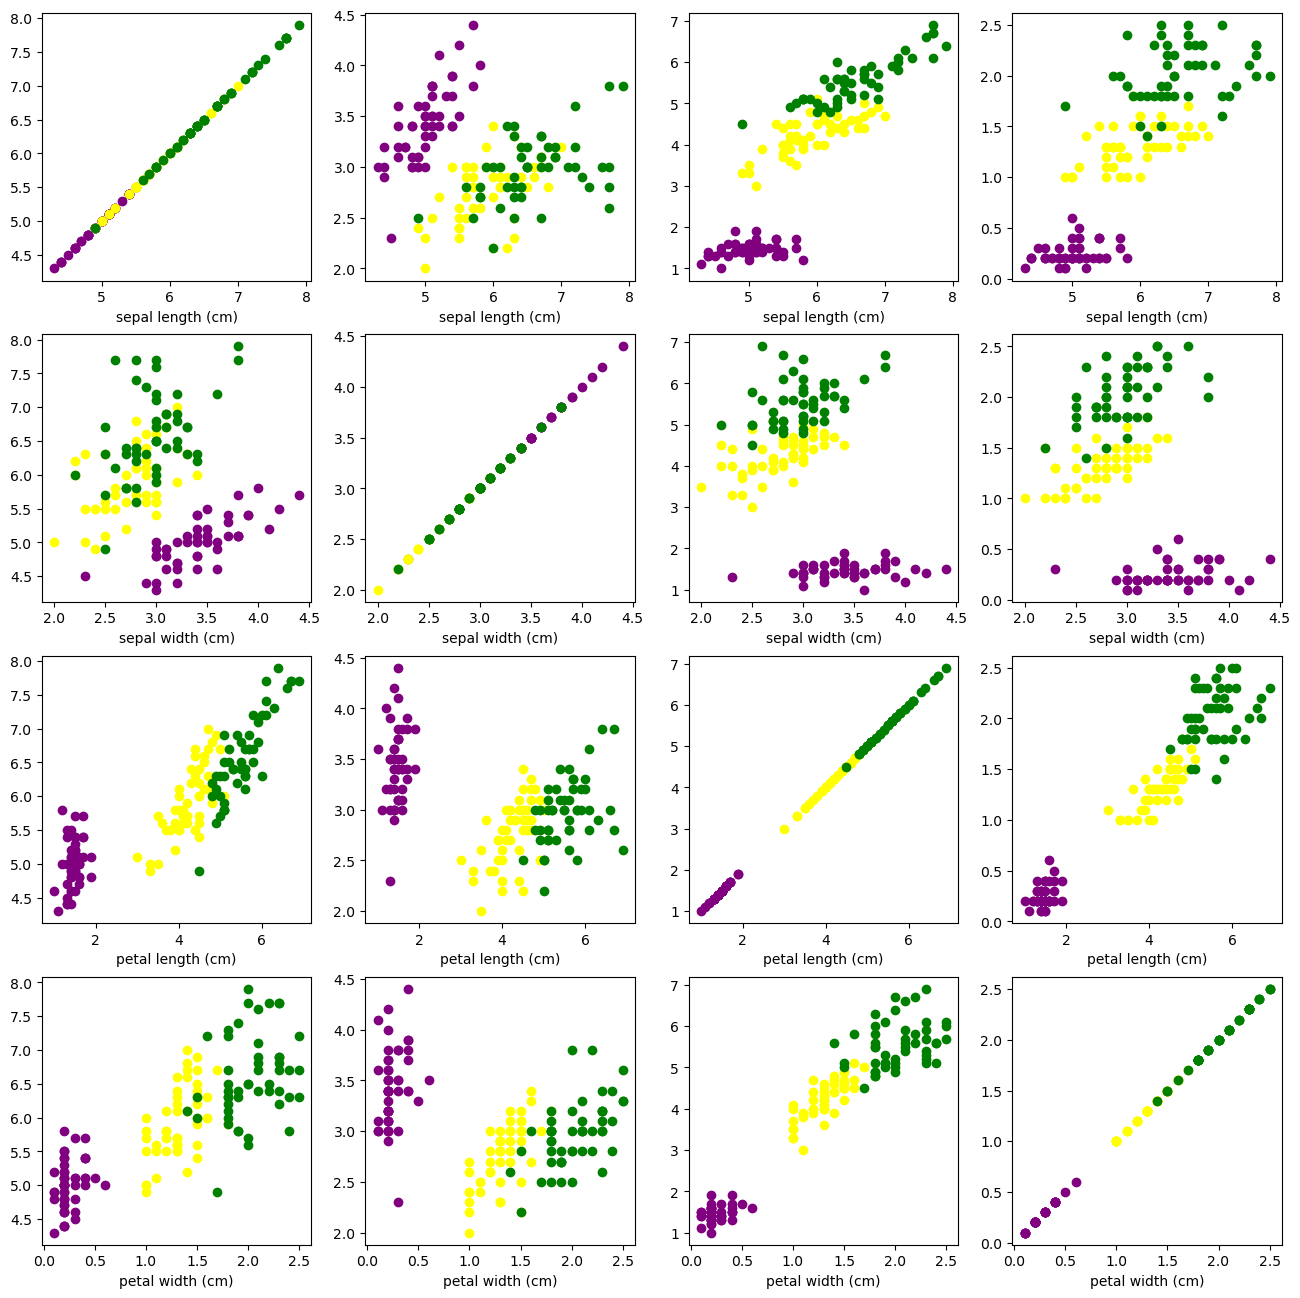

In [43]:
import matplotlib.pyplot as plt

n = len(data.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['purple', 'yellow', 'green']

for x in range(n):
    for y in range(n):
        xname = data.feature_names[x]
        yname = data.feature_names[y]
        for color_ind in range(len(data.target_names)):
            ax[x, y].scatter(data.data[data.target==color_ind, x], 
                             data.data[data.target==color_ind, y],
                             label=data.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)